In [2]:
import pandas as pd

Path_0 = 'confidence_score_csv/noniid_cluster_0_attacker_fedavg.csv'
Path_05 = 'confidence_score_csv/noniid_cluster_20_attacker_05_fedavg.csv'
Path_1 = 'confidence_score_csv/noniid_cluster_20_attacker_10_fedavg.csv'

with open(Path_0, 'r') as file:
    noniid_0_attacker = pd.read_csv(file, index_col=0)
    
with open(Path_05, 'r') as file:
    noniid_20_attacker_05 = pd.read_csv(file, index_col=0)

with open(Path_1, 'r') as file:
    noniid_20_attacker_10 = pd.read_csv(file, index_col=0)

In [3]:
noniid_20_attacker_05

,Idx,Confidence score,Client,Type
0,0.0,0.290517,39.0,noise
1,NaN,NaN,NaN,NaN
2,2.0,0.322017,25.0,noise
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
49995,49995.0,0.373593,46.0,clean
49996,49996.0,0.336179,33.0,clean
49997,49997.0,0.388637,23.0,clean
49998,NaN,NaN,NaN,NaN


In [3]:
noniid_20_attacker_05[noniid_20_attacker_05['Type']=='clean'].describe()

,Idx,Confidence score,Client
count,20000.000000,20000.000000,20000.000000
mean,24955.350000,0.431275,24.212500
std,14436.023174,0.123460,14.225065
min,5.000000,0.190889,0.000000
25%,12433.750000,0.340902,11.750000
50%,24948.000000,0.408580,24.000000
75%,37427.500000,0.497990,36.000000
max,49997.000000,0.990717,49.000000


In [4]:
noniid_20_attacker_05[noniid_20_attacker_05['Type']=='noise'].describe()

,Idx,Confidence score,Client
count,5000.000000,5000.000000,5000.000000
mean,24936.541000,0.299095,25.650000
std,14587.073098,0.031951,15.174767
min,0.000000,0.225253,3.000000
25%,12209.000000,0.276613,12.750000
50%,25145.500000,0.294775,25.500000
75%,37576.500000,0.316268,39.500000
max,49975.000000,0.709460,48.000000


Confidence score cua noise < clean

In [5]:
noniid_20_attacker_05[noniid_20_attacker_05['Type']=='noise']['Client'].unique()


array([39., 25., 46.,  4.,  8., 47.,  3., 37., 32., 41., 30., 45., 26.,
        6., 48., 19., 17., 13., 15., 12.])

In [6]:
noniid_20_attacker_05[noniid_20_attacker_05['Client']==4].describe()

,Idx,Confidence score,Client
count,500.000000,500.000000,500.0
mean,25407.730000,0.373149,4.0
std,14405.511407,0.124674,0.0
min,23.000000,0.216837,4.0
25%,13395.500000,0.288803,4.0
50%,25046.000000,0.322710,4.0
75%,38032.000000,0.422280,4.0
max,49923.000000,0.967642,4.0


In [7]:
noniid_20_attacker_05[noniid_20_attacker_05['Client']==45][noniid_20_attacker_05['Type']=='clean'].describe()

/tmp/ipykernel_20800/2384304666.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  noniid_20_attacker_05[noniid_20_attacker_05['Client']==45][noniid_20_attacker_05['Type']=='clean'].describe()


,Idx,Confidence score,Client
count,250.000000,250.000000,250.0
mean,24705.804000,0.432161,45.0
std,14079.860062,0.130517,0.0
min,144.000000,0.206912,45.0
25%,12480.000000,0.338982,45.0
50%,24720.500000,0.406647,45.0
75%,37334.250000,0.512538,45.0
max,49537.000000,0.958727,45.0


In [8]:
noniid_20_attacker_05[noniid_20_attacker_05['Client']==45][noniid_20_attacker_05['Type']=='noise'].describe()


/tmp/ipykernel_20800/4037365517.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  noniid_20_attacker_05[noniid_20_attacker_05['Client']==45][noniid_20_attacker_05['Type']=='noise'].describe()


,Idx,Confidence score,Client
count,250.000000,250.000000,250.0
mean,25060.368000,0.296695,45.0
std,14344.072671,0.033869,0.0
min,143.000000,0.230238,45.0
25%,13244.500000,0.272321,45.0
50%,25714.000000,0.289977,45.0
75%,36579.250000,0.316841,45.0
max,49928.000000,0.434576,45.0


In [9]:
#trong cung 1 client, confidence core cua noise < clean

In [10]:
attlist = noniid_20_attacker_05[noniid_20_attacker_05['Type']=='noise']['Client'].unique()

list_attacker = []
list_normal = []
for client in range(50):
    type_ = "Attacker" if client in attlist else "Normal"
    print(f'client {client}:',noniid_20_attacker_05[noniid_20_attacker_05['Client']==client]['Confidence score'].sum()/len(noniid_20_attacker_05[noniid_20_attacker_05['Client']==client]['Confidence score']), type_)
    if type_ == "Normal":
        list_normal.append(noniid_20_attacker_05[noniid_20_attacker_05['Client']==client]['Confidence score'].sum()/len(noniid_20_attacker_05[noniid_20_attacker_05['Client']==client]['Confidence score']))
    else:
        list_attacker.append(noniid_20_attacker_05[noniid_20_attacker_05['Client']==client]['Confidence score'].sum()/len(noniid_20_attacker_05[noniid_20_attacker_05['Client']==client]['Confidence score']))
print("avg attacker confidence score: ", sum(list_attacker)/len(list_attacker))
print(list_attacker)
print("avg normal confidence score: ", sum(list_normal)/len(list_normal))
print(list_normal)
print((sum(list_attacker)/len(list_attacker) + sum(list_normal)/len(list_normal))/2)

client 0: 0.42768116714681187 Normal
client 1: 0.4375279853418469 Normal
client 2: 0.4303123358181545 Normal
client 3: 0.3593589411497116 Attacker
client 4: 0.3731487932990898 Attacker
client 5: 0.42104402595086426 Normal
client 6: 0.3626844439238309 Attacker
client 7: 0.43793659237192734 Normal
client 8: 0.3603921071191628 Attacker
client 9: 0.43362988210198555 Normal
client 10: 0.42042864963209087 Normal
client 11: 0.4394912808850408 Normal
client 12: 0.3640211858166589 Attacker
client 13: 0.364972776256005 Attacker
client 14: 0.4314788102561777 Normal
client 15: 0.37108737878666975 Attacker
client 16: 0.4310603964933577 Normal
client 17: 0.3667938112670725 Attacker
client 18: 0.42317163793955537 Normal
client 19: 0.3571381767921978 Attacker
client 20: 0.4155861207480366 Normal
client 21: 0.41240613369800544 Normal
client 22: 0.4138365080022451 Normal
client 23: 0.4212712547702448 Normal
client 24: 0.41271004369243597 Normal
client 25: 0.361877872377634 Attacker
client 26: 0.35416150

tong confidence score cua noise client < clean client

In [10]:
for client in range(50):
    
    print(f'client {client}:',noniid_0_attacker[noniid_0_attacker['Client']==client]['Confidence score'].sum()/len(noniid_0_attacker[noniid_0_attacker['Client']==client]['Confidence score']))

client 0: 0.42411800026210644
client 1: 0.45153303583338855
client 2: 0.44520946382795057
client 3: 0.4200560450570923
client 4: 0.4670728102035143
client 5: 0.4274307381528265
client 6: 0.4452239472836256
client 7: 0.44381437562902765
client 8: 0.43753767410251826
client 9: 0.4408279491073706
client 10: 0.43036781297488647
client 11: 0.4486535521663725
client 12: 0.42337549405031727
client 13: 0.4401033393661181
client 14: 0.4371444747303472
client 15: 0.443944069258372
client 16: 0.43716044930149517
client 17: 0.43501973590457976
client 18: 0.4279086176444377
client 19: 0.4369599718145198
client 20: 0.4209797628956872
client 21: 0.41307534901327203
client 22: 0.4169344537520047
client 23: 0.42487424353361125
client 24: 0.41641747713318233
client 25: 0.43508715312217555
client 26: 0.4251044622950064
client 27: 0.4274100134539253
client 28: 0.4301628316175647
client 29: 0.41122434961597115
client 30: 0.42566168321079983
client 31: 0.47658018800616264
client 32: 0.46570286929081467
clie

khong co attacker, tong confidence score cac client tuong duong nhau

In [11]:
attlist = noniid_20_attacker_05[noniid_20_attacker_05['Type']=='noise']['Client'].unique()

for client in range(50):
    type_ = "Attacker" if client in attlist else "Normal"
    print(f'client {client}:',noniid_20_attacker_05[noniid_20_attacker_05['Client']==client]['Confidence score'].sum()/len(noniid_20_attacker_05[noniid_20_attacker_05['Client']==client]['Confidence score']), type_,noniid_0_attacker[noniid_0_attacker['Client']==client]['Confidence score'].sum()/len(noniid_0_attacker[noniid_0_attacker['Client']==client]['Confidence score']))

client 0: 0.42768116714681187 Normal 0.42411800026210644
client 1: 0.4375279853418469 Normal 0.45153303583338855
client 2: 0.4303123358181545 Normal 0.44520946382795057
client 3: 0.3593589411497116 Attacker 0.4200560450570923
client 4: 0.3731487932990898 Attacker 0.4670728102035143
client 5: 0.42104402595086426 Normal 0.4274307381528265
client 6: 0.3626844439238309 Attacker 0.4452239472836256
client 7: 0.43793659237192734 Normal 0.44381437562902765
client 8: 0.3603921071191628 Attacker 0.43753767410251826
client 9: 0.43362988210198555 Normal 0.4408279491073706
client 10: 0.42042864963209087 Normal 0.43036781297488647
client 11: 0.4394912808850408 Normal 0.4486535521663725
client 12: 0.3640211858166589 Attacker 0.42337549405031727
client 13: 0.364972776256005 Attacker 0.4401033393661181
client 14: 0.4314788102561777 Normal 0.4371444747303472
client 15: 0.37108737878666975 Attacker 0.443944069258372
client 16: 0.4310603964933577 Normal 0.43716044930149517
client 17: 0.3667938112670725 At

In [4]:
noniid_20_attacker_10.describe()

,Idx,Confidence score,Client
count,25000.000000,25000.000000,25000.000000
mean,24951.588200,0.397465,24.500000
std,14466.068312,0.104087,14.431158
min,0.000000,0.206075,0.000000
25%,12390.000000,0.320919,12.000000
50%,24992.500000,0.369034,24.500000
75%,37454.750000,0.450531,37.000000
max,49997.000000,0.971813,49.000000


In [5]:
noniid_20_attacker_10[noniid_20_attacker_10['Type']=='clean'].describe()

,Idx,Confidence score,Client
count,15000.000000,15000.000000,15000.000000
mean,24942.436267,0.444714,23.733333
std,14460.149825,0.106816,13.861519
min,5.000000,0.206075,0.000000
25%,12483.750000,0.366666,11.000000
50%,24845.500000,0.428147,23.500000
75%,37443.250000,0.505063,35.000000
max,49997.000000,0.971813,49.000000


In [6]:
noniid_20_attacker_10[noniid_20_attacker_10['Type']=='noise'].describe()


,Idx,Confidence score,Client
count,10000.000000,10000.000000,10000.000000
mean,24965.316100,0.326591,25.650000
std,14475.653864,0.039990,15.174008
min,0.000000,0.222664,3.000000
25%,12221.250000,0.298553,12.750000
50%,25258.500000,0.322718,25.500000
75%,37493.000000,0.351228,39.500000
max,49995.000000,0.615384,48.000000


tang noise 50 -> 100% lam giam confidence score cua clean va tang cua noise

In [7]:
noniid_20_attacker_10[noniid_20_attacker_10['Type']=='noise']['Client'].unique()


array([39., 25., 26., 46., 15.,  4., 47., 41.,  8., 32., 48.,  3., 37.,
       19., 30., 45.,  6., 17., 13., 12.])

In [8]:
noniid_20_attacker_10[noniid_20_attacker_10['Client']==0][noniid_20_attacker_10['Type']=='clean'].describe()

/tmp/ipykernel_21071/881227902.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  noniid_20_attacker_10[noniid_20_attacker_10['Client']==0][noniid_20_attacker_10['Type']=='clean'].describe()


,Idx,Confidence score,Client
count,500.000000,500.000000,500.0
mean,25664.068000,0.454758,0.0
std,14192.352885,0.108044,0.0
min,7.000000,0.231101,0.0
25%,12983.500000,0.377936,0.0
50%,25592.500000,0.440276,0.0
75%,38487.500000,0.517239,0.0
max,49849.000000,0.783501,0.0


In [9]:
noniid_20_attacker_10[noniid_20_attacker_10['Client']==4][noniid_20_attacker_10['Type']=='noise'].describe()


/tmp/ipykernel_21071/2397176774.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  noniid_20_attacker_10[noniid_20_attacker_10['Client']==4][noniid_20_attacker_10['Type']=='noise'].describe()


,Idx,Confidence score,Client
count,500.000000,500.000000,500.0
mean,25407.730000,0.323207,4.0
std,14405.511407,0.035505,0.0
min,23.000000,0.238031,4.0
25%,13395.500000,0.299219,4.0
50%,25046.000000,0.320637,4.0
75%,38032.000000,0.343672,4.0
max,49923.000000,0.459791,4.0


In [10]:
attlist = noniid_20_attacker_10[noniid_20_attacker_10['Type']=='noise']['Client'].unique()

for client in range(50):
    type_ = "Attacker" if client in attlist else "Normal"
    print(f'client {client}:',noniid_20_attacker_10[noniid_20_attacker_10['Client']==client]['Confidence score'].sum(), type_)

client 0: 227.37907255471993 Normal
client 1: 233.18055612519385 Normal
client 2: 219.22737511737006 Normal
client 3: 164.21074328422546 Attacker
client 4: 161.60340616614982 Attacker
client 5: 226.2888489146443 Normal
client 6: 157.53937206715347 Attacker
client 7: 235.39526322028703 Normal
client 8: 162.75827879334486 Attacker
client 9: 231.4945178072561 Normal
client 10: 225.56980298324066 Normal
client 11: 229.91842732280492 Normal
client 12: 168.1771675914526 Attacker
client 13: 164.10842676228947 Attacker
client 14: 219.71397146085897 Normal
client 15: 162.53289606670538 Attacker
client 16: 226.23232932607917 Normal
client 17: 161.01711834255943 Attacker
client 18: 217.63026289162892 Normal
client 19: 159.7870342483123 Attacker
client 20: 214.13488228216363 Normal
client 21: 214.88820078969002 Normal
client 22: 214.58606273929277 Normal
client 23: 219.1434652630772 Normal
client 24: 214.92965540289876 Normal
client 25: 161.96580866256426 Attacker
client 26: 161.8735687518731 Atta

In [19]:
client 0 thuong te vi chi co 2 client trong cum

SyntaxError: invalid syntax (4130023023.py, line 1)

In [ ]:
y_iid_0_attacker = iid_0_attacker[iid_0_attacker['Type'] == 'clean']['Confidence score']
x_iid_0_attacker = iid_0_attacker[iid_0_attacker['Type'] == 'clean']['Idx']
x_iid_0_attacker[:100]

0      0
1      1
2      2
3      3
4      4
      ..
95    95
96    96
97    97
98    98
99    99
Name: Idx, Length: 100, dtype: int64

[]

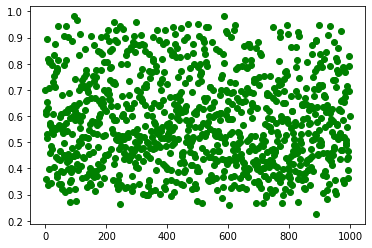

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_iid_0_attacker[:1000], y_iid_0_attacker[:1000], c='g')
plt.plot()